# Introduction to Scikit-Learn (sklearn)

This notebook demonstrats some of the most useful functions of the sklearn lib.

In [2]:
what_were_covering=[
'0. An end-to-end Scikit-Learn workflow',
'1. Getting the data ready',
'2. Choose the right estimator/algorithm for our problems',
'3. Fit the model/algorithm and use it to make predictions on our data',
'4. Evaluating a model',
'5. Improve a model',
'6. Save and load a trained model',
'7. Putting it all together!']

In [3]:
# Standart import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [4]:
# 1. Get the data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X (features matrix)
X=heart_disease.drop("target", axis=1)

# Create y ()
y=heart_disease["target"]

In [6]:
import warnings
warnings.filterwarnings("default")

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [9]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.3 (main, Apr 19 2023, 18:51:09) [Clang 14.0.6 ]
executable: /Users/katherine/Desktop/sample_project/env/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
      sklearn: 1.2.2
          pip: 23.0.1
   setuptools: 66.0.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/katherine/Desktop/sample_project/env/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 2
threading_layer: pthreads
   architecture: Haswell

       filepath: /Users/katherine/Desktop/sample_project/env/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4


In [10]:
clf.fit(X_train, y_train);
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2


In [11]:
y_preds=clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [12]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[28,  5],
       [ 5, 23]])

In [16]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [17]:
# 5. Imporve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Tryind model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Tryind model with 10 estimators...
Model accuracy on test set: 75.41%
 
Tryind model with 20 estimators...
Model accuracy on test set: 77.05%
 
Tryind model with 30 estimators...
Model accuracy on test set: 78.69%
 
Tryind model with 40 estimators...
Model accuracy on test set: 83.61%
 
Tryind model with 50 estimators...
Model accuracy on test set: 85.25%
 
Tryind model with 60 estimators...
Model accuracy on test set: 81.97%
 
Tryind model with 70 estimators...
Model accuracy on test set: 85.25%
 
Tryind model with 80 estimators...
Model accuracy on test set: 81.97%
 
Tryind model with 90 estimators...
Model accuracy on test set: 81.97%
 


In [18]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl", "wb"))

/var/folders/b0/wmyn6_8d0xl5y7_7lb047cq40000gp/T/ipykernel_19765/2675521782.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf,open("random_forest_model_1.pkl", "wb"))


In [19]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

/var/folders/b0/wmyn6_8d0xl5y7_7lb047cq40000gp/T/ipykernel_19765/1165323931.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))


0.819672131147541

In [20]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting NaN values to numerical values (also called fature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [36]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [37]:
len(car_sales)

1000

In [38]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [39]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [40]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make', 'Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (imputation).
2. Remove the samples with missing data altogether.

In [44]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [47]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make', 'Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill missing data  with Pandas

In [48]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [49]:
# Check out dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [50]:
# Remove rows with missing Price value 
car_sales_missing.dropna(inplace=True)

In [51]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
len(car_sales_missing)

950

In [53]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make', 'Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with Scikit-Learn

In [54]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
# Drop the rows witn no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [58]:
# Fill mising data witj skleatn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [59]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make","Colour","Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [60]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make', 'Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [62]:
# Now we've got our data as numbers and filled 
# Let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for your problem
### Some things to note:
* Sklearn refers to ML models, algorithms as estimators.
* Classification problem - predicting a category (heart desease or not)
  * Sometimes you'll see clf (shirt for classifier) used as a classsification estimator
* Regression problem - predicting a number (selling price of a car)

If you are working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the skllearn ML map

### 2.1 Picking a ML model for a regression problem

Let's use California housing dataset

In [63]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [64]:
housing_df=pd.DataFrame(housing["data"], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [66]:
# Import algorithm
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df['target'] # median house price in $100,000s

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the set)
model.score(X_test, y_test)

0.5758549611440126

What if `Ridge` didn;t work or the score didn't fit our needs?

Well, we could always try a different model...
How about we try an ensemble model (an ensemble is combintaion of smaller models to try and make better predictions than just a single model)?

In [67]:
# Import the RandomForestRegression model class from the ensemble module

from sklearn.ensemble import RandomForestRegressor

# Setup random seeds
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df['target'] # median house price in $100,000s

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate and fit the model (on the training set)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the set)
model.score(X_test, y_test)

0.8066196804802649

## 2.2 Picking a ML model for classification problem

In [68]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [70]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)


0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

In [71]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [72]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [73]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make predictions using a ML model

#Two ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [74]:
# Use a train model to make predictions
clf.predict(np.array([1,7,8,3,4]))

/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [75]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [76]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [77]:
# Compare predictions to truth lable s to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [79]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [80]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

## 4. Evaluating a ML model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem=specific metric functions

### 4.1 Evaluating a model with `score` method

In [81]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)

# Fit the model to the data
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [82]:
clf.score(X_train, y_train)

1.0

In [83]:
clf.score(X_test, y_test)

0.8688524590163934

Let's use the `score()` on our regression problem...

In [84]:
# Import the RandomForestRegression model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seeds
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df['target'] # median house price in $100,000s

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
# Check the score of the model (on the set)
model.score(X_test, y_test)

0.8066196804802649

### 4.2 Evaluating a model using the `scoring` parameter

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
clf.score(X_test, y_test)

0.8524590163934426

In [88]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [89]:
np.random.seed(42)

# Single training and test split score
clf_single_score=clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two 
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [90]:
# Take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5,scoring=None))

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf, X,y,cv=5)

In [92]:
np.mean(cross_val_score)

0.8248087431693989

In [93]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curves are a caomparison of a model's true positive  rate (tpr)versus a models false positive rate (fpr)

* True positive = model predicts 1 when trurh is 1
* False positive = model predicts 1 when trurh is 
* True negative = model predicts 0 when trurh is 0
* False negative = model predicts 1 when trurh is 1

In [94]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [95]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make prediction with probabilities 
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [96]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [97]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

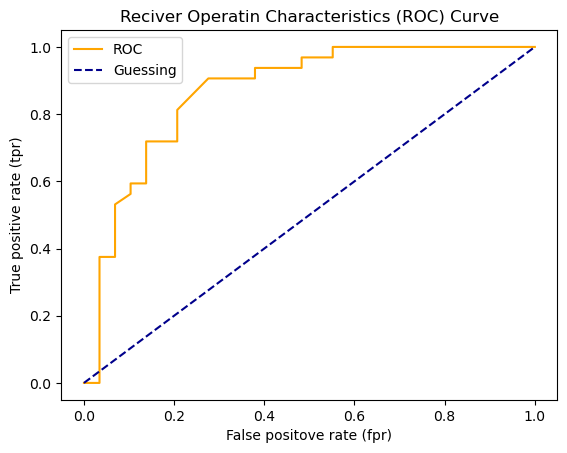

In [98]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    ant true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positove rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciver Operatin Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [100]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [101]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Label'])

Predicted Label,0,1
Actual Labels,,
0,23,6
1,6,26


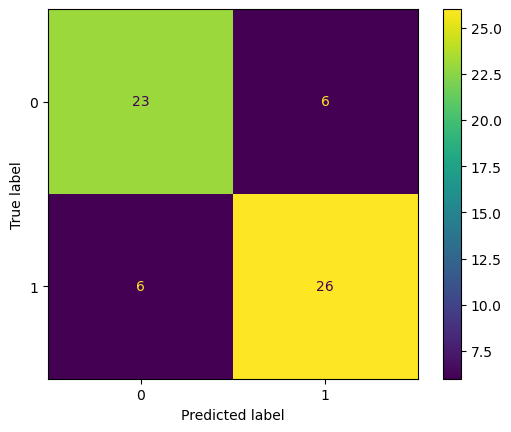

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

### Classification  Report

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.2.2 Regression model evaluation metrics

The ones we're going to cover are:
1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [104]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
model.score(X_test,y_test)

0.8066196804802649

In [106]:
y_test.mean()

2.0550030959302323

In [107]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [108]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [109]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [110]:
# MAE
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae=mean_absolute_error(y_test, y_pred)
mae

0.3265721842781009

In [111]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_pred})
df['differences'] = df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [112]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

**Mean squred error (MSE)**

MSE is the mean of the square of the errors between actual and predcited values.

In [113]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_absolute_error(y_test,y_preds)
mse

0.3265721842781009

In [114]:
df['squared_differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [115]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2534073069137548

In [116]:
df_large_err=df.copy()
df_large_err.iloc[0]['squared_differences']=160

In [117]:
df_large_err.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,160.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [118]:
# Calculate MSE with large error
df_large_err['squared_differences'].mean()

0.2921669281381734

## 4.2.3 Finally using the `scoring` parameter

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [120]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc=cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [121]:
# Cross-validated accuracy
print(f"The cross-validated accuract is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuract is: 82.48%


In [122]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc=cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [123]:
# Cross-validated accuracy
print(f"The cross-validated accuract is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuract is: 82.48%


In [124]:
# Precision 
np.random.seed(42)
cv_precision=cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [125]:
# Cross-validated precision
print(f"The cross-validated accuract is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated accuract is: 83.30%


In [126]:
# Recall
np.random.seed(42)
cv_recall=cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [127]:
# Cross-validated recall
print(f"The cross-validated accuract is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated accuract is: 85.45%


Let's see the scoring parameter for regression problem...

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target',axis=1)
y = housing_df['target']

model = RandomForestRegressor(n_estimators=100)

In [136]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [135]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [133]:
# Mean absolute error 
cv_mae = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4835493810852714

In [134]:
# MSE 
cv_mse = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.46281833778669723

## 4.3 Using different evaluations metrics as sklearn functions


In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Creat X & Y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model
clf = RandomForestClassifier(n_estimators=100)

# Fit model
clf.fit(X_train, y_train)

# Make predictions 
y_preds=clf.predict(X_test)

# Evaluate model using evaluation functions
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"f1: {f1_score(y_test, y_preds)}")

Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
f1: 0.8615384615384615


In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Creat X & Y
X = housing_df.drop('target',axis=1)
y = housing_df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions 
y_preds=model.predict(X_test)

# Evaluate model using evaluation functions
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (more data, better)
* Could we improve our data? (more information about data, better)

From a model perspective:
* Is there a better model that we couls use?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameters - model find these patterns in data
* Hyperparameters - settings on a model ypu can adjust to (potenially) improve its ability to find patterns

Three ways to adjust  hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters by hand

In [139]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `max_samples_split`
* `n_estimators`

In [182]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict={'accuracy': accuracy,
               'precision': precision,
               'recal': recall,
               'f1': f1}
    print(f'Accuracy:{accuracy * 100:.2f}%')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall:.2}')
    print(f'F1:{f1:.2}')

    return metric_dict

In [185]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf=RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier of validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy:82.22%
Precision:0.81
Recall:0.88
F1:0.85


{'accuracy': 0.8222222222222222,
 'precision': 0.8148148148148148,
 'recal': 0.88,
 'f1': 0.8461538461538461}

In [184]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train, y_train)

# Make predictions 
y_preds_2=clf_2.predict(X_valid)

# Evaluate th second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy:80.00%
Precision:0.81
Recall:0.84
F1:0.82


{'accuracy': 0.8,
 'precision': 0.8076923076923077,
 'recal': 0.84,
 'f1': 0.8235294117647058}

### 5.2 Hyperprameter tuning with RandomizedSearchCV

In [188]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
       'max_depth':[None, 5, 10, 20, 30],
       'max_features':['auto', 'sqrt'],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           cv=5,
                           n_iter=5, # number of models to try
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [189]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [190]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions 
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy:80.33%
Precision:0.75
Recall:0.86
F1:0.8


### 5.3 Hyperparameters tuning with GridSearchCV

In [191]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [192]:
from sklearn.model_selection import GridSearchCV

grid_2 = {'n_estimators': [200,500,1000],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.8s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.7s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.7s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.7s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.8s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None

/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4], 'min_samples_split': [6],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [193]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [194]:
# make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy:83.61%
Precision:0.78
Recall:0.89
F1:0.83


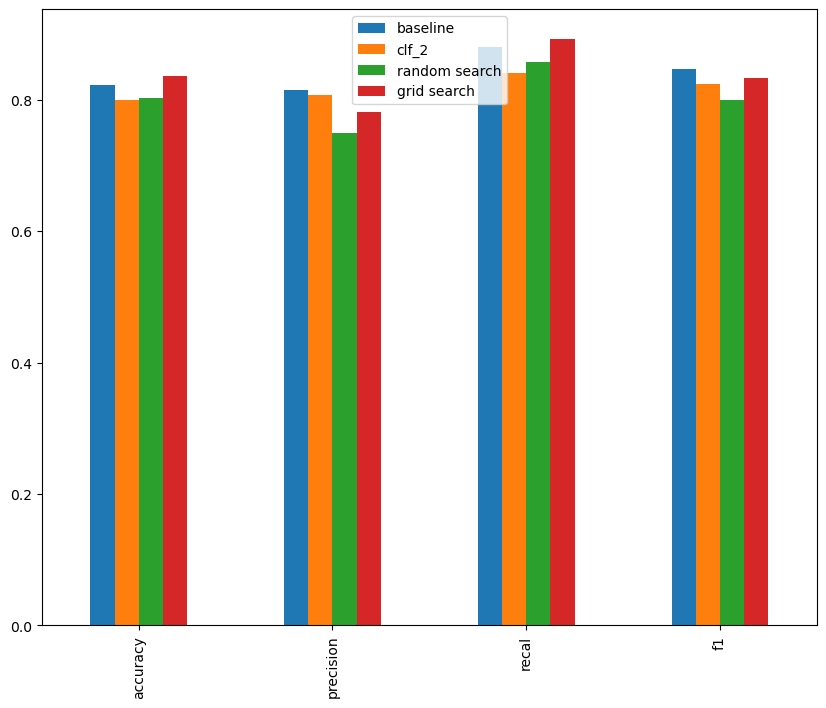

In [197]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})
compare_metrics.plot.bar(figsize = (10,8));

## 6. Saving and loading trained ML model

Two ways to save and load ML models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [198]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model-1.pkl",'wb'))

/var/folders/b0/wmyn6_8d0xl5y7_7lb047cq40000gp/T/ipykernel_19765/1181739944.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model-1.pkl'>
  pickle.dump(gs_clf, open("gs_random_forest_model-1.pkl",'wb'))


In [199]:
# Load a saved model 
loaded_pickle_model = pickle.load(open('gs_random_forest_model-1.pkl','rb')) 

/var/folders/b0/wmyn6_8d0xl5y7_7lb047cq40000gp/T/ipykernel_19765/1068599456.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model-1.pkl'>
  loaded_pickle_model = pickle.load(open('gs_random_forest_model-1.pkl','rb'))


In [200]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy:83.61%
Precision:0.78
Recall:0.89
F1:0.83


{'accuracy': 0.8360655737704918,
 'precision': 0.78125,
 'recal': 0.8928571428571429,
 'f1': 0.8333333333333334}

**Joblib**

In [201]:
from joblib import dump, load

# Save model to file 
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [202]:
# Import a saved joblib model
loaded_job_model = load(filename='gs_random_forest_model_1.joblib')

In [203]:
# Make some predictions
joblib_y_preds=loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy:83.61%
Precision:0.78
Recall:0.89
F1:0.83


{'accuracy': 0.8360655737704918,
 'precision': 0.78125,
 'recal': 0.8928571428571429,
 'f1': 0.8333333333333334}

## 7. Putting it all together

In [215]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.isna().sum(), data

(Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64,
        Make Colour  Odometer (KM)  Doors    Price
 0     Honda  White        35431.0    4.0  15323.0
 1       BMW   Blue       192714.0    5.0  19943.0
 2     Honda  White        84714.0    4.0  28343.0
 3    Toyota  White       154365.0    4.0  13434.0
 4    Nissan   Blue       181577.0    3.0  14043.0
 ..      ...    ...            ...    ...      ...
 995  Toyota  Black        35820.0    4.0  32042.0
 996     NaN  White       155144.0    3.0   5716.0
 997  Nissan   Blue        66604.0    4.0  31570.0
 998   Honda  White       215883.0    4.0   4001.0
 999  Toyota   Blue       248360.0    4.0  12732.0
 
 [1000 rows x 5 columns])

In [216]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features =['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))])

door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))])

numercia_features = ['Odometer (KM)']
numerica_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# Setup preprocissing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_features),
        ('num', numerica_transformer, numercia_features)])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ('model', RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with `Pipelina`

In [219]:
# Use GridSearchCV with our regression pipeline
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators':[100,1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   3.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   3.6s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   3.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.8s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   3.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   3.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.7s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.7s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.8s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.0s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


/Users/katherine/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [220]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [223]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']